<a href="https://colab.research.google.com/github/i40-Tools/I40KG-Embeddings/blob/master/Community-Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I40 standards landscape similarity analysis using embeddings

## Overview

In this notebook, we show the similarity analysis between Industry 4.0 Standards. 
To do so, we create embeddings about the Industry 4.0 Standards Knowledge Graph (I40KG) developed by [Grangel-Gonzales et. al.](https://www.researchgate.net/publication/318208930_The_Industry_40_Standards_Landscape_from_a_Semantic_Integration_Perspective)

The embeddings are located here: [I40 Embeddings](https://github.com/i40-Tools/I40KG-Embeddings/tree/master/logs_sto)

In [77]:
import scipy
import numpy as np
import pandas as pd
import json
from sklearn.metrics.pairwise import cosine_similarity

### In this section we show the analysis of similarity among standards belonging to the same framework

In [230]:
import json
from rdflib import Graph
SIMETRIC_MATRIX_FILE = "simetric_matrix.tsv"
ENTITIES_FILE = "entities.txt"
list_sim = []
output='result/TransH/'

g = Graph()
g.parse("sto/sto-enriched.nt", format="nt")
    
len(g) # prints 2
    
qres = g.query(
    """PREFIX owl: <http://www.w3.org/2002/07/owl#>
       PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
       PREFIX sto: <https://w3id.org/i40/sto#>
    
    select ?s where {
            ?s rdf:type sto:Standard .
    } limit 1000""")

      
#with open("embeddings/TransE/entities_to_embeddings.json",'rb') as f:
with open("sto/relatedTo/embeddings/TransH/entities_to_embeddings.json",'rb') as f:
    array = json.load(f)
new_dict = {}
for row in qres:
    for key,value in array.items():
        if key == "%s" % row:
            tem = key
            #print(key)
            new_dict[tem] = array[key]


with open('output_standard_same_framework.json','w') as f:
    # this would place the entire output on one line
    # use json.dump(lista_items, f, indent=4) to "pretty-print" with four spaces per indent
    json.dump(new_dict, f) 

    
#to read the file containing standards/frameworks along with their embeddings   
with open('output_standard_same_framework.json', 'r') as f:
    array = json.load(f)

### Create standard/framework list

In [231]:
list_n = [*array]
entities = "\n".join(str(x) for x in list_n)
n_ent = str(len(list_n))
entity = open(output+'semep/'+ENTITIES_FILE, mode="w+")
entity.write(n_ent+"\n"+entities)
entity.close()
print(len([*array]))

322


### Compare each standard/framework with all the other standards/frameworks to build cosine similarity matrix

In [232]:
result = {}
s=n_ent+"\n"
cosine_matrix = pd.DataFrame(index=list(array.keys()), columns=list(array.keys()))
cosine_matrix = cosine_matrix.fillna(0.0)
for key,value in array.items():
    for keyC,valueC in array.items():
        sim = abs(1-scipy.spatial.distance.cosine(value,valueC)) #send the values of the standards/frameworks to cosine similarity function
        sim = round(sim, 5)
        list_sim.append(sim)
        cosine_matrix.at[key, keyC] = sim

threshold = np.percentile(list_sim, 90)
print("percentil", threshold)
for col in cosine_matrix.columns:
    cosine_matrix.loc[cosine_matrix[col] < threshold, [col]] = 0
cosine_matrix.head()

percentil 0.29773


,https://w3id.org/i40/sto#IEC_62656,https://w3id.org/i40/sto#IEC_60050_1984,https://w3id.org/i40/sto#IEC_60381_P2_E1,https://w3id.org/i40/sto#IEC_29182_P1,https://w3id.org/i40/sto#ISA_62443,https://w3id.org/i40/sto#RFC_7644,https://w3id.org/i40/sto#IEC_60870_P6_S2_1995,https://w3id.org/i40/sto#SysML,https://w3id.org/i40/sto#W3C_OWL,https://w3id.org/i40/sto#IEC_61512,...,https://w3id.org/i40/sto#IEC_61511,https://w3id.org/i40/sto#ISO_27000,https://w3id.org/i40/sto#IEEE_1905_1-2013,https://w3id.org/i40/sto#IEC_60870_P5_S4_E1,https://w3id.org/i40/sto#IEC_60870_P5_S1_E1,https://w3id.org/i40/sto#IEC_62832,https://w3id.org/i40/sto#ISO_26262,https://w3id.org/i40/sto#IEC_61334_P4_S511_E1,https://w3id.org/i40/sto#ISO_15531-2x,https://w3id.org/i40/sto#IEC_60204_P11_E1
https://w3id.org/i40/sto#IEC_62656,1.0,0.0,0.0,0.0,0.0,0.31839,0.0,0.0,0.0,0.0,...,0.36437,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
https://w3id.org/i40/sto#IEC_60050_1984,0.0,1.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
https://w3id.org/i40/sto#IEC_60381_P2_E1,0.0,0.0,1.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.37152,0.0,0.0
https://w3id.org/i40/sto#IEC_29182_P1,0.0,0.0,0.0,1.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
https://w3id.org/i40/sto#ISA_62443,0.0,0.0,0.0,0.0,1.0,0.00000,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0


In [233]:
cosine_matrix.shape

(322, 322)

### Save cosine similarity matrix with the structure SemEP need

In [234]:
f = open(output+'semep/'+'matrix_undirected_cosine.tsv', mode="w+")
f.write(str(cosine_matrix.shape[0])+"\n")
f.close()
cosine_matrix.to_csv(output+'semep/'+'matrix_undirected_cosine.tsv', mode='a', sep=' ',
                     index=False, header=False, float_format='%.5f')

In [ ]:
# Run SemEP from Doker (https://hub.docker.com/r/kemele/semepnode) OR (https://github.com/SDM-TIB/SemEP-Node)
#!sudo docker run -it --rm -v /media/rivas/Data1/Data-mining/KCAP-I40KG-Embeddings/I40KG-Embeddings/result/TransD/semep:/data kemele/semepnode:23-05-2018 semEP-node entities.txt matrix_undirected_cosine.tsv 0.20612

In [235]:
num_cls = 18

### METIS Undirected MAX based similarity graph file

In [236]:
metislines = []
nodes = {"name":[], "id":[]}
kv = 1
edges = 0
for i, row in cosine_matrix.iterrows():
    val = ""
    ix = 1
    ledges = 0
    found = False
    for k in row.keys():
        if i != k and row[k] > 0:
            val += str(ix) + " " + str(int(row[k] * 100000)) + " "
            # Only one edge is counted between two nodes, i.e., (u,v) and (v, u) edges are counted as one
            # Self links are also ignored, Notive ix>kv
            #if ix > kv:
            ledges += 1
            found = True
        ix += 1
    if found:
        # This node is connected
        metislines.append(val.strip())
        edges += ledges
        nodes["name"].append(i)
        nodes['id'].append(str(kv))
    else:
        # disconnected RDF-MTs are given 10^6 value as similarity value
        metislines.append(str(kv) + " 100000")
        edges += 1
    
    kv += 1    
nodes = pd.DataFrame(nodes)
print(edges)
nodes.head()

10048


,name,id
0,https://w3id.org/i40/sto#IEC_62656,1
1,https://w3id.org/i40/sto#IEC_60050_1984,2
2,https://w3id.org/i40/sto#IEC_60381_P2_E1,3
3,https://w3id.org/i40/sto#IEC_29182_P1,4
4,https://w3id.org/i40/sto#ISA_62443,5


In [237]:
numedges = edges//2
numedges

5024

### Save filemetis.graph to execute METIS algorithm

In [238]:
#!mkdir result/metis
ff = open(output+'metis/metis.graph', 'w+')
ff.write(str(cosine_matrix.shape[0])+" "+ str(numedges) + " 001\n")
met = [m.strip() + "\n" for m in metislines]
ff.writelines(met)
ff.close()

In [14]:
#nodes.to_csv(output+'metis/METIS_NODE-CODES.tsv', sep='\t', index=False)

In [ ]:
#Run METIS from Doker: https://hub.docker.com/r/kemele/metis
#!sudo docker run -it --rm -v /media/rivas/Data1/Data-mining/KCAP-I40KG-Embeddings/I40KG-Embeddings/result/TransD/metis:/data kemele/metis:5.1.0 gpmetis metis.graph 2

### Read results standards of 10 Partitions by METIS algorithm

In [239]:
parts = open(output+'metis/metis.graph.part.'+str(num_cls)).readlines()
parts = [p.strip() for p in parts]
print(parts)
len(parts)

['7', '13', '8', '1', '14', '17', '4', '3', '0', '10', '10', '6', '4', '0', '12', '15', '9', '7', '9', '5', '17', '2', '5', '1', '5', '10', '11', '4', '17', '2', '7', '11', '1', '12', '1', '5', '11', '1', '9', '12', '10', '14', '16', '14', '2', '4', '8', '4', '7', '6', '5', '3', '12', '14', '6', '16', '7', '13', '13', '17', '3', '8', '11', '14', '8', '3', '14', '9', '16', '10', '13', '5', '14', '14', '14', '13', '6', '0', '0', '2', '13', '11', '1', '13', '10', '17', '1', '12', '2', '15', '6', '17', '2', '11', '14', '14', '0', '12', '4', '9', '5', '13', '7', '2', '13', '15', '8', '7', '2', '14', '4', '5', '1', '10', '9', '11', '5', '9', '1', '12', '0', '12', '3', '11', '16', '8', '2', '14', '6', '11', '4', '10', '12', '17', '2', '3', '2', '1', '7', '9', '9', '17', '5', '8', '6', '3', '0', '11', '17', '4', '16', '7', '9', '2', '11', '3', '6', '13', '5', '14', '12', '6', '12', '9', '2', '3', '9', '0', '11', '2', '13', '15', '10', '8', '11', '14', '16', '17', '11', '8', '3', '1', '2', '0',

322

### Save each partition standads into a file

In [240]:
i = 0
#partitions = {"0":[], "1":[], "2":[], "3":[], "4":[], "5":[], "6":[], "7":[], "8":[], "9":[], "10":[], "11":[], "12":[], "13":[], "14":[], "15":[], "16":[], "17":[]}
partitions = dict((str(k), []) for k in range(num_cls))
for p in parts:
    name = nodes.iat[i, 0]
    i +=1
    partitions[str(p)].append(name)
    
#f = open(output+'metis/metis_10_standards.graph.json', "w+")
#json.dump(partitions, f)
#f.close()
partitions

{'0': ['https://w3id.org/i40/sto#W3C_OWL',
  'https://w3id.org/i40/sto#SCOR',
  'https://w3id.org/i40/sto#W3C_RIF',
  'https://w3id.org/i40/sto#OAGIS',
  'https://w3id.org/i40/sto#IEC_62061',
  'https://w3id.org/i40/sto#IEC_61970_P452_E3',
  'https://w3id.org/i40/sto#IEC_61010_P2_S012_E1',
  'https://w3id.org/i40/sto#W3C_SPARQL',
  'https://w3id.org/i40/sto#RFC_793',
  'https://w3id.org/i40/sto#IEC_61400_P25_S5_E2',
  'https://w3id.org/i40/sto#ISO_20546',
  'https://w3id.org/i40/sto#ISO_22745-11',
  'https://w3id.org/i40/sto#IEC_61810_P2_E3',
  'https://w3id.org/i40/sto#IEEE_802_16-2012',
  'https://w3id.org/i40/sto#ISO_50001',
  'https://w3id.org/i40/sto#IEC_81714',
  'https://w3id.org/i40/sto#Thread',
  'https://w3id.org/i40/sto#BPEL'],
 '1': ['https://w3id.org/i40/sto#IEC_29182_P1',
  'https://w3id.org/i40/sto#ISO_13485',
  'https://w3id.org/i40/sto#ISO_11898-1',
  'https://w3id.org/i40/sto#IEEE_802',
  'https://w3id.org/i40/sto#DIN_EN_50129',
  'https://w3id.org/i40/sto#NIST_500-29

In [241]:
i = 0
count = 0
#!mkdir result/metis/clusters
for p in partitions:
    if len(partitions[p]) == 0:
        continue
    count += len(partitions[p])
    f = open(output+'metis/clusters/standards-part' + str(i) + '.txt', 'w+')
    [f.write(l+'\n') for l in partitions[p]]
    f.close()
    i+=1
print(count)

322


## K-means Analyse 

In [242]:
vectors = []
for key,value in array.items():
    vectors.append(value)
X = np.array(vectors)

In [243]:
X[0]

array([-16.89497375,   7.00100708,  25.65343475,  -1.74236703,
         6.88993645, -24.70697594,  -6.90956593,   9.67146873,
       -10.27224541,   3.02639103,  -2.61683083,  20.92944145,
       -10.65450859,  10.16536427,  -6.28449678, -16.59979439,
         4.32204771,  -4.36477661,  -3.77813005,   1.68392682,
        -3.11226964,  29.46860504,   9.32194996,  -5.70959902,
       -18.04664993,  -5.76625729,  -6.0140214 ,  18.43202019,
       -14.99124146,   7.59530354,  12.12935162,   4.47550488,
        13.27360439,   0.62803161, -18.06359291, -20.43959427,
         1.21690834,  18.12190437,  13.95973778,  16.56799316,
        14.51007938,  -5.49146843, -22.23113441,   5.38244343,
         6.77484417,   0.52863067, -16.32381439,  18.1060791 ,
        18.55163574,  18.47229004])

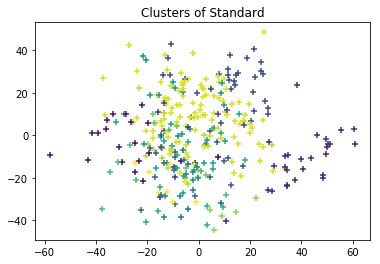

In [244]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

pca = PCA(n_components=2).fit(X)
pca_c = pca.transform(X)
#kmeans = KMeans(n_clusters=7, random_state=0).fit(X)
kmeans = KMeans(n_clusters=num_cls, random_state=0).fit(cosine_matrix)

plt.scatter(pca_c[:, 0], pca_c[:, 1], c=kmeans.labels_, marker='+')
plt.title("Clusters of Standard")

plt.show()

### Number of standard by clsuter

In [245]:
pd.value_counts(kmeans.labels_, 0)

0       2
1      18
2      27
3       7
4      35
5      19
6       4
7       7
8       7
9      19
10     19
11     10
12      9
13      5
14      5
15     14
16    106
17      9
dtype: int64

### Save each partition standads into a file

In [246]:
list_cluster = pd.DataFrame()
list_cluster.insert(0, 'standards', list_n)
list_cluster.insert(1, 'clusters', kmeans.labels_)
#list_cluster = list_cluster.sort_values(by=['clusters'], ascending=False)

In [247]:
list_cluster.head()

,standards,clusters
0,https://w3id.org/i40/sto#IEC_62656,4
1,https://w3id.org/i40/sto#IEC_60050_1984,16
2,https://w3id.org/i40/sto#IEC_60381_P2_E1,9
3,https://w3id.org/i40/sto#IEC_29182_P1,10
4,https://w3id.org/i40/sto#ISA_62443,16


In [248]:
#!mkdir result/Kmeans
#!mkdir result/Kmeans/cluster
cls_0 = list_cluster.loc[list_cluster['clusters'] == 0]
cls_1 = list_cluster.loc[list_cluster['clusters'] == 1]

cls_2 = list_cluster.loc[list_cluster['clusters'] == 2]
cls_3 = list_cluster.loc[list_cluster['clusters'] == 3]
cls_4 = list_cluster.loc[list_cluster['clusters'] == 4]
cls_5 = list_cluster.loc[list_cluster['clusters'] == 5]
cls_6 = list_cluster.loc[list_cluster['clusters'] == 6]

cls_7 = list_cluster.loc[list_cluster['clusters'] == 7]
cls_8 = list_cluster.loc[list_cluster['clusters'] == 8]

cls_9 = list_cluster.loc[list_cluster['clusters'] == 9]
cls_10 = list_cluster.loc[list_cluster['clusters'] == 10]
cls_11 = list_cluster.loc[list_cluster['clusters'] == 11]
cls_12 = list_cluster.loc[list_cluster['clusters'] == 12]
cls_13 = list_cluster.loc[list_cluster['clusters'] == 13]
cls_14 = list_cluster.loc[list_cluster['clusters'] == 14]
cls_15 = list_cluster.loc[list_cluster['clusters'] == 15]
cls_16 = list_cluster.loc[list_cluster['clusters'] == 16]
cls_17 = list_cluster.loc[list_cluster['clusters'] == 17]
"""
cls_18 = list_cluster.loc[list_cluster['clusters'] == 18]
cls_19 = list_cluster.loc[list_cluster['clusters'] == 19]
cls_20 = list_cluster.loc[list_cluster['clusters'] == 20]
cls_21 = list_cluster.loc[list_cluster['clusters'] == 21]
cls_22 = list_cluster.loc[list_cluster['clusters'] == 22]
cls_23 = list_cluster.loc[list_cluster['clusters'] == 23]
cls_24 = list_cluster.loc[list_cluster['clusters'] == 24]
cls_25 = list_cluster.loc[list_cluster['clusters'] == 25]
cls_26 = list_cluster.loc[list_cluster['clusters'] == 26]
cls_27 = list_cluster.loc[list_cluster['clusters'] == 27]
cls_28 = list_cluster.loc[list_cluster['clusters'] == 28]
cls_29 = list_cluster.loc[list_cluster['clusters'] == 29]
cls_30 = list_cluster.loc[list_cluster['clusters'] == 30]
cls_31 = list_cluster.loc[list_cluster['clusters'] == 31]
cls_32 = list_cluster.loc[list_cluster['clusters'] == 32]
cls_33 = list_cluster.loc[list_cluster['clusters'] == 33]
cls_34 = list_cluster.loc[list_cluster['clusters'] == 34]

cls_35 = list_cluster.loc[list_cluster['clusters'] == 35]
cls_36 = list_cluster.loc[list_cluster['clusters'] == 36]
cls_37 = list_cluster.loc[list_cluster['clusters'] == 37]
cls_38 = list_cluster.loc[list_cluster['clusters'] == 38]
cls_39 = list_cluster.loc[list_cluster['clusters'] == 39]
cls_40 = list_cluster.loc[list_cluster['clusters'] == 40]
"""

cls_0['standards'].to_csv(output+'Kmeans/clusters/cluster-0.txt', index=False)
cls_1['standards'].to_csv(output+'Kmeans/clusters/cluster-1.txt', index=False)

cls_2['standards'].to_csv(output+'Kmeans/clusters/cluster-2.txt', index=False)
cls_3['standards'].to_csv(output+'Kmeans/clusters/cluster-3.txt', index=False)
cls_4['standards'].to_csv(output+'Kmeans/clusters/cluster-4.txt', index=False)
cls_5['standards'].to_csv(output+'Kmeans/clusters/cluster-5.txt', index=False)
cls_6['standards'].to_csv(output+'Kmeans/clusters/cluster-6.txt', index=False)

cls_7['standards'].to_csv(output+'Kmeans/clusters/cluster-7.txt', index=False)
cls_8['standards'].to_csv(output+'Kmeans/clusters/cluster-8.txt', index=False)
cls_9['standards'].to_csv(output+'Kmeans/clusters/cluster-9.txt', index=False)
cls_10['standards'].to_csv(output+'Kmeans/clusters/cluster-10.txt', index=False)
cls_11['standards'].to_csv(output+'Kmeans/clusters/cluster-11.txt', index=False)
cls_12['standards'].to_csv(output+'Kmeans/clusters/cluster-12.txt', index=False)
cls_13['standards'].to_csv(output+'Kmeans/clusters/cluster-13.txt', index=False)
cls_14['standards'].to_csv(output+'Kmeans/clusters/cluster-14.txt', index=False)
cls_15['standards'].to_csv(output+'Kmeans/clusters/cluster-15.txt', index=False)
cls_16['standards'].to_csv(output+'Kmeans/clusters/cluster-16.txt', index=False)
cls_17['standards'].to_csv(output+'Kmeans/clusters/cluster-17.txt', index=False)
"""
cls_18['standards'].to_csv(output+'Kmeans/clusters/cluster-18.txt', index=False)
cls_19['standards'].to_csv(output+'Kmeans/clusters/cluster-19.txt', index=False)
cls_20['standards'].to_csv(output+'Kmeans/clusters/cluster-20.txt', index=False)
cls_21['standards'].to_csv(output+'Kmeans/clusters/cluster-21.txt', index=False)
cls_22['standards'].to_csv(output+'Kmeans/clusters/cluster-22.txt', index=False)
cls_23['standards'].to_csv(output+'Kmeans/clusters/cluster-23.txt', index=False)
cls_24['standards'].to_csv(output+'Kmeans/clusters/cluster-24.txt', index=False)
cls_25['standards'].to_csv(output+'Kmeans/clusters/cluster-25.txt', index=False)
cls_26['standards'].to_csv(output+'Kmeans/clusters/cluster-26.txt', index=False)
cls_27['standards'].to_csv(output+'Kmeans/clusters/cluster-27.txt', index=False)
cls_28['standards'].to_csv(output+'Kmeans/clusters/cluster-28.txt', index=False)
cls_29['standards'].to_csv(output+'Kmeans/clusters/cluster-29.txt', index=False)
cls_30['standards'].to_csv(output+'Kmeans/clusters/cluster-30.txt', index=False)
cls_31['standards'].to_csv(output+'Kmeans/clusters/cluster-31.txt', index=False)
cls_32['standards'].to_csv(output+'Kmeans/clusters/cluster-32.txt', index=False)
cls_33['standards'].to_csv(output+'Kmeans/clusters/cluster-33.txt', index=False)
cls_34['standards'].to_csv(output+'Kmeans/clusters/cluster-34.txt', index=False)

cls_35['standards'].to_csv(output+'Kmeans/clusters/cluster-35.txt', index=False)
cls_36['standards'].to_csv(output+'Kmeans/clusters/cluster-36.txt', index=False)
cls_37['standards'].to_csv(output+'Kmeans/clusters/cluster-37.txt', index=False)
cls_38['standards'].to_csv(output+'Kmeans/clusters/cluster-38.txt', index=False)
cls_39['standards'].to_csv(output+'Kmeans/clusters/cluster-39.txt', index=False)
cls_40['standards'].to_csv(output+'Kmeans/clusters/cluster-40.txt', index=False)
"""

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:54: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.t

"\ncls_18['standards'].to_csv(output+'Kmeans/clusters/cluster-18.txt', index=False)\ncls_19['standards'].to_csv(output+'Kmeans/clusters/cluster-19.txt', index=False)\ncls_20['standards'].to_csv(output+'Kmeans/clusters/cluster-20.txt', index=False)\ncls_21['standards'].to_csv(output+'Kmeans/clusters/cluster-21.txt', index=False)\ncls_22['standards'].to_csv(output+'Kmeans/clusters/cluster-22.txt', index=False)\ncls_23['standards'].to_csv(output+'Kmeans/clusters/cluster-23.txt', index=False)\ncls_24['standards'].to_csv(output+'Kmeans/clusters/cluster-24.txt', index=False)\ncls_25['standards'].to_csv(output+'Kmeans/clusters/cluster-25.txt', index=False)\ncls_26['standards'].to_csv(output+'Kmeans/clusters/cluster-26.txt', index=False)\ncls_27['standards'].to_csv(output+'Kmeans/clusters/cluster-27.txt', index=False)\ncls_28['standards'].to_csv(output+'Kmeans/clusters/cluster-28.txt', index=False)\ncls_29['standards'].to_csv(output+'Kmeans/clusters/cluster-29.txt', index=False)\ncls_30['stand

### Density plot of standard similarity

In [219]:
#i=0
similarity=[]
#standard_similarity = pd.DataFrame(columns=['std_1', 'std_2', 'similarity'])
for key,value in array.items():
    for keyC,valueC in array.items():
        if key != keyC:
            sim = abs(1-scipy.spatial.distance.cosine(value,valueC)) #send the values of the standards/frameworks to cosine similarity function
            similarity.append(sim)
            #standard_similarity.loc[i]=[key, keyC, sim]
            #i+=1
standard_similarity = pd.DataFrame()
standard_similarity.insert(0, 'similarity', similarity)

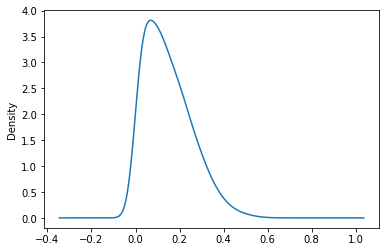

In [220]:
standard_similarity["similarity"].plot.kde(bw_method=0.3)

In [249]:
#Format required of the matrix to run clustering Measures
#!mkdir result/measures
cosine_matrix.to_csv(output+'measures/matrix_undirected_cosine.txt', mode='w+',
                     index=False, header=False, float_format='%.5f')
with open(output+'measures/'+ENTITIES_FILE, "w") as entity:
    entity.write(n_ent+"\n"+entities)

In [ ]:
#Run clustering Measures from: https://github.com/SDM-TIB/korona-graph-partitioning/tree/master/utils/clusteringMeasures
#!rivas@LXZ15265:/media/rivas/Data1/Data-mining/KCAP-I40KG-Embeddings/korona-graph-partitioning/utils/clusteringMeasures$ ./cma measures/clusters measures/entities.txt measures/matrix_undirected_cosine.txt

In [228]:
path = '../korona-graph-partitioning/utils/clusteringMeasures/'
cls_m = path + "output.txt"
measure = []
static = 16
n_metric = 5
cls_measures = pd.read_csv(cls_m, delimiter=",", header=None)
index_start = static + num_cls
index_end = index_start + n_metric
for pos in range(index_start, index_end):
    a = cls_measures.iloc[pos].to_string()
    b = a.split('\\t')[1]
    measure.append(float(b))
print(*[measure[0],measure[4], measure[3], measure[2], measure[1]], sep='\n')

0.671415336526
0.708567979489
1658.560460000003
0.170004081714
0.349829556103


In [229]:
#Transform these three metric to (Inv. Conductance, Norm.Modularity and Inv.Norm.Total Cut) for each algorithm

#conductance = 0.705256059271
#modularity = 0.166783425861
#total_cut = 1012.587679999999
#max_cut = sum(list_sim)

max_cut = sum(cosine_matrix.sum(axis = 0, skipna = True))

measure[0] = 1.0 - measure[0]
measure[2] = (measure[2] + 0.5)/1.5
measure[3] = 1-(measure[3]/max_cut)
print(*[round(measure[0],3) ,round(measure[4],3), round(measure[3],3), round(measure[2],3), round(measure[1],3)], sep='\n')

0.329
0.709
0.694
0.447
0.35


### Cluster evaluation in terms of prediction metrics

In [742]:
# Set data

cls_evaluation_TransD_th_85 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.415, 0.592, 0.413],
'Inv. Performance': [0.451, 0.512, 0.404],
'Inv. Norm.Total Cut': [0.824, 0.817, 0.853],
'Norm.Modularity': [0.372, 0.403, 0.385],
'Coverage': [0.620, 0.605, 0.682]
})

cls_evaluation_TransE_th_85 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.553, 0.595, 0.349],
'Inv. Performance': [0.505, 0.513, 0.267],
'Inv. Norm.Total Cut': [0.806, 0.821, 0.902],
'Norm.Modularity': [0.387, 0.409, 0.374],
'Coverage': [0.583, 0.615, 0.790]
})

cls_evaluation_TransH_th_85 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.277, 0.333, 0.329],
'Inv. Performance': [0.805, 0.836, 0.709],
'Inv. Norm.Total Cut': [0.670, 0.694, 0.694],
'Norm.Modularity': [0.417, 0.465, 0.447],
'Coverage': [0.297, 0.350, 0.350]
})

cls_evaluation_TransR_th_85 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.464, 0.592, 0.569],
'Inv. Performance': [0.481, 0.512, 0.509],
'Inv. Norm.Total Cut': [0.812, 0.819, 0.816],
'Norm.Modularity': [0.377, 0.406, 0.400],
'Coverage': [0.596, 0.609, 0.604]
})
#==========================================================================
cls_evaluation_TransD_th_90 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.219, 0.311, 0.282],
'Inv. Performance': [0.831, 0.841, 0.745],
'Inv. Norm.Total Cut': [0.649, 0.690, 0.714],
'Norm.Modularity': [0.383, 0.446, 0.417],
'Coverage': [0.221, 0.312, 0.365]
})

cls_evaluation_TransE_th_90 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.201, 0.275, 0.280],
'Inv. Performance': [0.862, 0.870, 0.820],
'Inv. Norm.Total Cut': [0.640, 0.674, 0.687],
'Norm.Modularity': [0.394, 0.444, 0.437],
'Coverage': [0.204, 0.278, 0.307]
})

cls_evaluation_TransH_th_90 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.191, 0.215, 0.208],
'Inv. Performance': [0.911, 0.921, 0.892],
'Inv. Norm.Total Cut': [0.645, 0.643, 0.655],
'Norm.Modularity': [0.432, 0.442, 0.454],
'Coverage': [0.228, 0.224, 0.251]
})

cls_evaluation_TransR_th_90 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.199, 0.293, 0.258],
'Inv. Performance': [0.836, 0.858, 0.797],
'Inv. Norm.Total Cut': [0.647, 0.681, 0.690],
'Norm.Modularity': [0.384, 0.445, 0.423],
'Coverage': [0.217, 0.293, 0.314]
})
#======================================================================
cls_evaluation_TransD_th_95 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.138, 0.225, 0.187],
'Inv. Performance': [0.955, 0.961, 0.932],
'Inv. Norm.Total Cut': [0.644, 0.678, 0.667],
'Norm.Modularity': [0.408, 0.463, 0.435],
'Coverage': [0.145, 0.226, 0.201]
})

cls_evaluation_TransE_th_95 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.132, 0.124, 0.197],
'Inv. Performance': [0.957, 0.958, 0.958],
'Inv. Norm.Total Cut': [0.635, 0.635, 0.665],
'Norm.Modularity': [0.397, 0.399, 0.446],
'Coverage': [0.127, 0.127, 0.201]
})

cls_evaluation_TransH_th_95 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.267, 0.172, 0.185],
'Inv. Performance': [0.957, 0.964, 0.856],
'Inv. Norm.Total Cut': [0.685, 0.640, 0.698],
'Norm.Modularity': [0.472, 0.423, 0.480],
'Coverage': [0.269, 0.166, 0.298]
})

cls_evaluation_TransR_th_95 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.124, 0.086, 0.201],
'Inv. Performance': [0.956, 0.956, 0.938],
'Inv. Norm.Total Cut': [0.638, 0.618, 0.668],
'Norm.Modularity': [0.401, 0.370, 0.438],
'Coverage': [0.133, 0.084, 0.206]
})

## Evaluation in term of threshold

In [422]:
# Set data

cls_evaluation_th_85 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.486, 0.595, 0.584],
'Inv. Performance': [0.483, 0.511, 0.510],
'Inv. Norm.Total Cut': [0.814, 0.816, 0.815],
'Norm.Modularity': [0.383, 0.402, 0.400],
'Coverage': [0.598, 0.603, 0.601]
})

cls_evaluation_th_90 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.212, 0.312, 0.283],
'Inv. Performance': [0.830, 0.841, 0.747],
'Inv. Norm.Total Cut': [0.647, 0.691, 0.714],
'Norm.Modularity': [0.379, 0.447, 0.421],
'Coverage': [0.217, 0.313, 0.366]
})

cls_evaluation_th_95 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.128, 0.223, 0.190],
'Inv. Performance': [0.954, 0.961, 0.951],
'Inv. Norm.Total Cut': [0.642, 0.677, 0.665],
'Norm.Modularity': [0.403, 0.462, 0.439],
'Coverage': [0.139, 0.224, 0.195]
})

In [897]:
def radar_plot(nrows, ncols, index, df):
    # Libraries
    import matplotlib.pyplot as plt
    from math import pi

    # ------- PART 1: Create background

    # number of variable
    categories=list(df)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(nrows, ncols, index, polar=True)

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    #plt.xticks(angles[:-1], categories, fontsize=7, rotation=40)
    plt.xticks(angles[:-1], categories, fontsize=10, rotation=40)
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.9], ['0','0.2', '0.3','0.4', '0.5', '0.6', '0.7', '0.9'],
               color="grey", size=5)
    plt.ylim(0,1.0)

    for label, angle in zip(ax.get_xticklabels(), angles):
        if angle in (0, np.pi):
            label.set_horizontalalignment('center')
        elif 0 < angle < np.pi:
            label.set_horizontalalignment('left')
        else:
            label.set_horizontalalignment('right')

    # ------- PART 2: Add plots

    # Plot each individual = each line of the data
    # I don't do a loop, because plotting more than 3 groups makes the chart unreadable

    # Algorithm3
    values=df.loc[2].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label="Kmeans")
    ax.fill(angles, values, 'r', alpha=0.1)

    # Algorithm2
    values=df.loc[1].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label="Metis")
    ax.fill(angles, values, 'r', alpha=0.1)
    
    # Algorithm1
    values=df.loc[0].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label="SemEP")
    ax.fill(angles, values, 'r', alpha=0.1)
    

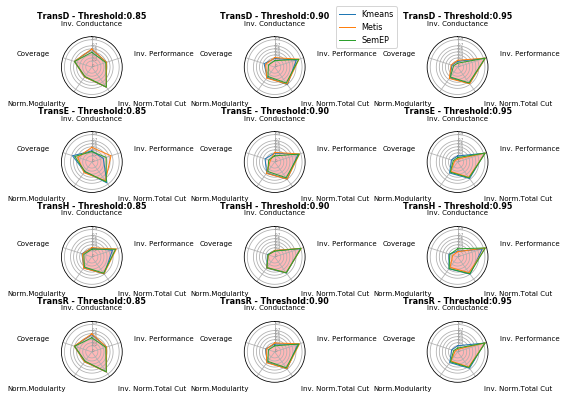

In [856]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# plot with various axes scales
plt.figure(1) #figsize=(20, 10)

# TransD
radar_plot(4, 3, 1,cls_evaluation_TransD_th_85)
plt.title('TransD - Threshold:0.85', y=1.2, fontsize=8, weight='bold')

# TransD
radar_plot(4, 3, 2,cls_evaluation_TransD_th_90)
plt.title('TransD - Threshold:0.90', y=1.2, fontsize=8, weight='bold')

# TransD
radar_plot(4, 3, 3,cls_evaluation_TransD_th_95)
plt.title('TransD - Threshold:0.95', y=1.2, fontsize=8, weight='bold')

# TransE
radar_plot(4, 3, 4,cls_evaluation_TransE_th_85)
plt.title('TransE - Threshold:0.85', y=1.2, fontsize=8, weight='bold')

# TransE
radar_plot(4, 3, 5,cls_evaluation_TransE_th_90)
plt.title('TransE - Threshold:0.90', y=1.2, fontsize=8, weight='bold')

# TransE
radar_plot(4, 3, 6,cls_evaluation_TransE_th_95)
plt.title('TransE - Threshold:0.95', y=1.2, fontsize=8, weight='bold')

# TransH
radar_plot(4, 3, 7,cls_evaluation_TransH_th_85)
plt.title('TransH - Threshold:0.85', y=1.2, fontsize=8, weight='bold')

# TransH
radar_plot(4, 3, 8,cls_evaluation_TransH_th_90)
plt.title('TransH - Threshold:0.90', y=1.2, fontsize=8, weight='bold')

# TransH
radar_plot(4, 3, 9,cls_evaluation_TransH_th_95)
plt.title('TransH - Threshold:0.95', y=1.2, fontsize=8, weight='bold')

# TransR
radar_plot(4,3,10,cls_evaluation_TransR_th_85)
plt.title('TransR - Threshold:0.85', y=1.2, fontsize=8, weight='bold')

# TransR
radar_plot(4,3,11,cls_evaluation_TransR_th_90)
plt.title('TransR - Threshold:0.90', y=1.2, fontsize=8, weight='bold')

# TransR
radar_plot(4,3,12,cls_evaluation_TransR_th_95)
plt.title('TransR - Threshold:0.95', y=1.2, fontsize=8, weight='bold')

# Format the minor tick labels of the y-axis into empty strings with
# `NullFormatter`, to avoid cumbering the axis with too many labels.
#plt.gca().yaxis.set_minor_formatter(NullFormatter())
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=1.2, bottom=0.0, left=0.0, right=1.27, hspace=0.56,
                    wspace=0)
plt.legend(loc = (-1.5, 5.5), ncol=1, fontsize=8)

plt.savefig("Measure of standards clusters based on Trans Family.pdf", format='pdf', bbox_inches = 'tight')
#plt.show()

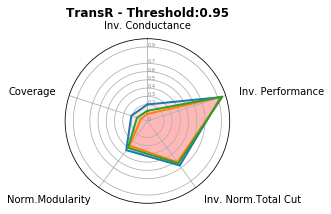

In [911]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# plot with various axes scales
plt.figure(1) #figsize=(20, 10)

# TransD
radar_plot(2,2,1,cls_evaluation_TransR_th_95)
plt.title('TransR - Threshold:0.95', y=1.1, fontsize=12, weight='bold')


plt.subplots_adjust(top=1.2, bottom=0.0, left=0.0, right=1.3, hspace=0.10,
                    wspace=0.1)
#plt.legend(loc = (-0.5, 0.9), ncol=1, fontsize='medium')


plt.savefig("TransR-Threshold:0.95.pdf", format='pdf', bbox_inches = 'tight')
#plt.show()